In [57]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [58]:
def synthetic_data(w, b, num_examples): #@save
    """"生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples,len(w)))
    print(X.shape)
    y = torch.matmul(X,w) + b
    print(y.shape)
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

In [59]:
true_w = torch.tensor([2, -3.4])
print(true_w.shape)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

torch.Size([2])
torch.Size([1000, 2])
torch.Size([1000])


In [60]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-2.1038,  0.5248]) 
label: tensor([-1.7885])


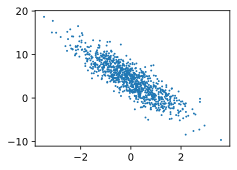

In [61]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

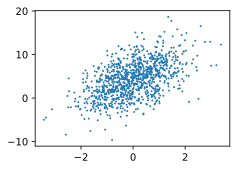

In [62]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (0)].detach().numpy(), labels.detach().numpy(), 1)

In [63]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [64]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.5970, -0.2984],
        [ 0.4039,  2.5130],
        [-0.6616,  0.0493],
        [-0.8220,  0.1714],
        [-0.0233,  1.1133],
        [-0.5606,  1.2860],
        [-0.4371, -0.5638],
        [ 1.9381, -0.7782],
        [ 0.1086,  2.0672],
        [ 0.8113, -0.5171]]) 
 tensor([[ 8.4134],
        [-3.5396],
        [ 2.7164],
        [ 1.9783],
        [ 0.3599],
        [-1.2807],
        [ 5.2549],
        [10.7167],
        [-2.6075],
        [ 7.5761]])


In [65]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True) 
# w = 0
b = torch.zeros(1, requires_grad=True)

In [66]:
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [67]:
def squared_loss(y_hat, y): #@save
    """均⽅损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [68]:
def sgd(params, lr, batch_size): #@save
    """⼩批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [69]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [70]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的⼩批量损失
        # 因为l形状是(batch_size,1)，⽽不是⼀个标量。l中的所有元素被加到⼀起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) # 使⽤参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.028428
epoch 2, loss 0.000092
epoch 3, loss 0.000046


In [71]:
print(true_w,"\t",true_b,"\n")
print(w.reshape(true_w.shape),"\n",b,"\n")
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

tensor([ 2.0000, -3.4000]) 	 4.2 

tensor([ 1.9994, -3.4005], grad_fn=<ReshapeAliasBackward0>) 
 tensor([4.1997], requires_grad=True) 

w的估计误差: tensor([0.0006, 0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)
